# Language of probability for machine learning : Markov Random Fields
This notebook is a follow up on Language of probability for machine learning. See : http://romain.raveaux.free.fr/document/NaiveBayesClassifier.html

## Author : Romain Raveaux

## Goal : 
An introduction to probabilistic graphical models. 

An application to Image Denoising.


## A simple illustration of Markov Random Fields : Image Denoising
The first example is taken from Christopher Bishop Book titled "Pattern Recognition And Machine Learning" more precisely from the section 8.3.3 


Let the observed noisy image be described by an array of binary pixel values $y_i \in \{−1, +1\}$, where the index 
$i = 1,\cdots, D$ runs over all pixels. We shall suppose that the image is obtained by taking an unknown noise-free image, 
described by binary pixel values $x_i \in \{−1, +1\}$ and randomly flipping the sign of pixels with some small probability. 
An example binary image, together with a noise corrupted image obtained by flipping the sign of the pixels with probability 10\%, 
is shown in Given the noisy image, our goal is to recover the original noise-free image.

(512, 512)


Text(0.5,1,'The histogram of the noisy image')

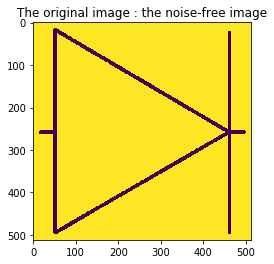

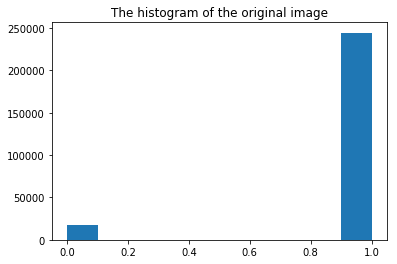

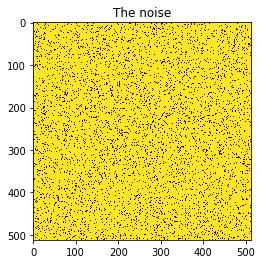

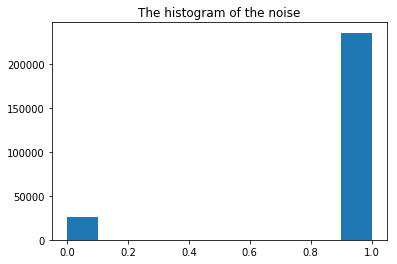

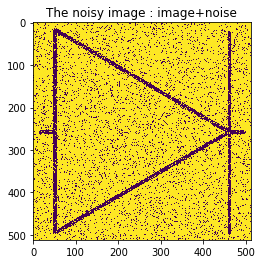

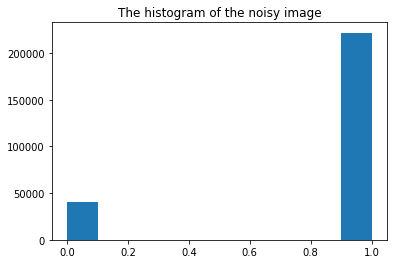

In [129]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random
%matplotlib inline  


Y=mpimg.imread("symbol031.png")
Y= Y[:,:,0]
print(Y.shape)
plt.figure(1)
plt.imshow(Y)
plt.title("The original image : the noise-free image")
plt.figure(2)
plt.hist(Y.flatten())
plt.title("The histogram of the original image")

noise = np.random.rand(Y.shape[0],Y.shape[1])
noise=noise<0.1
noise = 1-noise
plt.figure(4)
plt.imshow(noise)
plt.title("The noise")
plt.figure(5)
plt.hist(noise.flatten())
plt.title("The histogram of the noise")

Y=Y+noise

Y[Y==2]=0
Y=1-Y
plt.figure(6)
plt.imshow(Y)
plt.title("The noisy image : image+noise")
plt.figure(7)
plt.hist(Y.flatten())
plt.title("The histogram of the noisy image")



Text(0.5,1,'Changing the binary coding : For convenience 0 = -1 and 1 = 1')

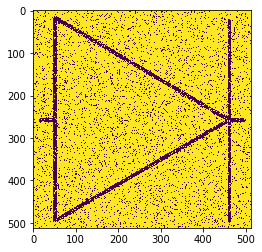

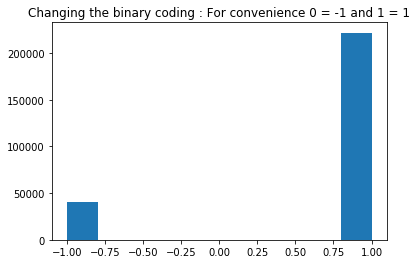

In [130]:
Y=Y*2
Y=Y-1
plt.figure(8)
plt.imshow(Y)
plt.figure(9)
plt.hist(Y.flatten())
plt.title("Changing the binary coding : For convenience 0 = -1 and 1 = 1")

Because the noise level is small, we know that there will be a strong correlation
between $x_i$ and $y_i$. We also know that neighbouring pixels xi and xj in an image
are strongly correlated. 
This prior knowledge can be captured using the Markov random field model whose undirected graph. See the figure below.


<img src="http://romain.raveaux.free.fr/document/markovfield.PNG"> 
Ref : Image from Christopher Bishop Pattern Recognition and Machine Learning, 2006.

This graph has two types of cliques, each of which contains two variables. The cliques of the form
$\{x_i, y_i\}$ have an associated energy function that expresses the correlation between these variables. We choose a very simple energy function for these cliques of the form $−\eta x_iy_i$ where $\eta$ is a positive constant. This has the desired effect of giving a lower energy (thus encouraging a higher probability) when $x_i$ and $y_i$ have the same
sign and a higher energy when they have the opposite sign.
The remaining cliques comprise pairs of variables $\{x_i, x_j\}$ where $i$ and $j$ are
indices of neighbouring pixels. Again, we want the energy to be lower when the
pixels have the same sign than when they have the opposite sign, and so we choose
an energy given by $−\beta x_i x_j$ where $\beta$ is a positive constant.
Because a potential function is an arbitrary, nonnegative function over a maximal
clique, we can multiply it by any nonnegative functions of subsets of the clique, or
equivalently we can add the corresponding energies. In this example, this allows us
to add an extra term $hx_i$ for each pixel $i$ in the noise-free image. Such a term has
the effect of biasing the model towards pixel values that have one particular sign in
preference to the other.
The complete energy function for the model then takes the form
$$E(X,Y)=h \sum_i x_i - \beta \sum_i \sum_{j \in \mathcal{N(i)}} x_ix_j -\eta \sum_i x_iy_i  $$
Where $\mathcal{N(i)}$ is the neiborhood of $i$.

which defines a joint distribution over $X$ and $Y$ given by 
$$ Pr(X, Y) = \frac{1}{Z} exp\{−E(X, Y)\}.$$
Here the quantity $Z$, sometimes called the partition function, is a normalization constant
and is given by
$$Z= \sum_{x \in \{-1,1\} } \prod_{i=1}^D exp\{−E(\{X, x_i=x\}, Y)\}$$

We now fix the elements of $Y$ to the observed values given by the pixels of the
noisy image, which implicitly defines a conditional distribution $Pr(X|Y)$ over noise free
images. This is an example of the Ising model, which has been widely studied in
statistical physics. For the purposes of image restoration, we wish to find an image X
having a high probability (ideally the maximum probability).

### The optimization problem
The problem to be solved can written either regarding to the energy function or the joint probability.
$$X^*=max_{X\in \{0,1\}^{W \times H}} Pr(X,Y)$$
$$X^* = min_{X\in \{0,1\}^{W \times H}} E(X,Y) $$

### Solving the optimization problem by iterated conditional modes
To solve this problem many algorithms can be used. Algorithms can be exact or heuristics. For an exact method, it is not guarranted to find the optimal solution in polynomial time. We will then present a simple heuristic called iterated conditional modes, or ICM which is simply an application of coordinate-wise gradient ascent.
The idea is first to initialize the variables $\{x_i\}$, which we do by simply setting $x_i =
y_i$ for all i. Then we take one node $x_i$ at a time and we evaluate the total energy
for the two possible states $x_i = +1$ and $x_i = −1$, keeping all other node variables
fixed, and set $x_i$ to whichever state has the lower energy. This will either leave
the probability unchanged, if $x_i$ is unchanged, or will increase it. Because only
one variable is changed, this is a simple local computation that can be performed
efficiently. We then repeat the update for another site, and so on, until some suitable
stopping criterion is satisfied. The nodes may be updated in a systematic way, for
instance by repeatedly raster scanning through the image, or by choosing nodes at
random.
If we have a sequence of updates in which every site is visited at least once,
and in which no changes to the variables are made, then by definition the algorithm 
will have converged to a local maximum of the probability. This need not, however,
correspond to the global maximum.
For the purposes of this simple illustration, we have fixed the parameters to be
$\beta = 1.0$, $\eta$ = 1.0 and $h = 0$. Note that leaving h = 0 simply means that the prior
probabilities of the two states of $x_i$ are equal. Starting with the observed noisy image
as the initial configuration, we run ICM until convergence, leading to the de-noised
image.


Iteration= 1  Energy= -1124790.0
Iteration= 2  Energy= -1226702.0
Iteration= 3  Energy= -1228562.0
Iteration= 4  Energy= -1228658.0
Iteration= 5  Energy= -1228680.0


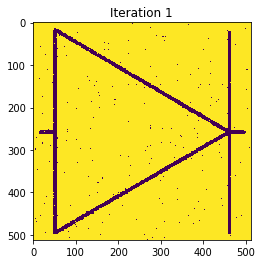

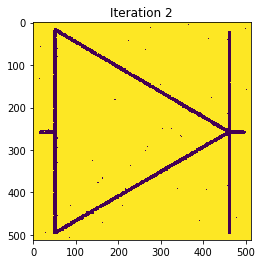

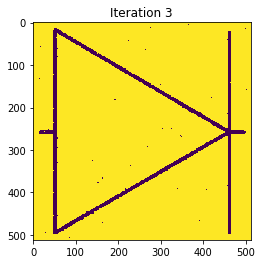

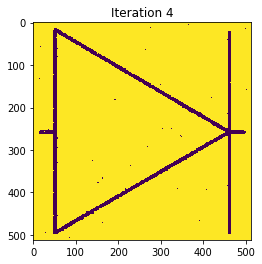

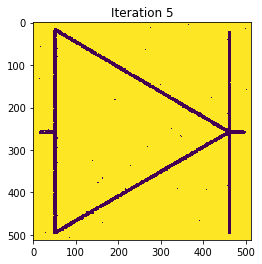

In [132]:
H,W = Y.shape
xx=[]
for ii in range(1,W-1):
    xx.append(ii)
np.random.shuffle(xx)

yy=[]
for jj in range(1,H-1):
    yy.append(jj)
np.random.shuffle(yy)
    
#X = np.zeros(Y.shape)
X=Y.copy()

#X = np.random.rand(Y.shape[0],Y.shape[1])
#X=X<0.5
#X = 1-X


h=0.0
beta=1
eta=1

nbiter=5
it=0
while it<nbiter:
    E=0
    for i in xx : 
        for j in yy : 
            x_i=-1
            e1 = h*x_i

            x_down=X[i,j-1]
            x_up=X[i,j+1]
            x_left=X[i-1,j]
            x_right=X[i+1,j]        
            e2 =x_i*x_down + x_i*x_up+x_i*x_left+x_i*x_right
            e2=-beta*e2

            y_i=Y[i,j]
            e3=-eta*x_i*y_i

            Eminus=e1+e2+e3


            x_i=1
            e1 = h*x_i

            x_down=X[i,j-1]
            x_up=X[i,j+1]
            x_left=X[i-1,j]
            x_right=X[i+1,j]        
            e2 =x_i*x_down + x_i*x_up+x_i*x_left+x_i*x_right
            e2=-beta*e2

            y_i=Y[i,j]
            e3=-eta*x_i*y_i

            Eplus=e1+e2+e3

            if Eminus<Eplus:
                X[i,j]=-1
                E=E+Eminus
            else:
                X[i,j]=1 
                E=E+Eplus
    it=it+1
    print("Iteration=",it," Energy=", E)
    plt.figure((it+10))
    plt.imshow(X)
    plt.title("Iteration "+str(it))

(array([ 17857.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 244287.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

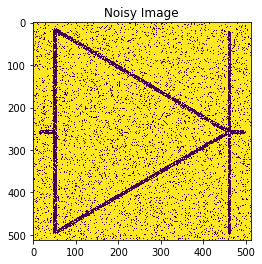

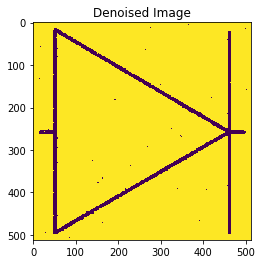

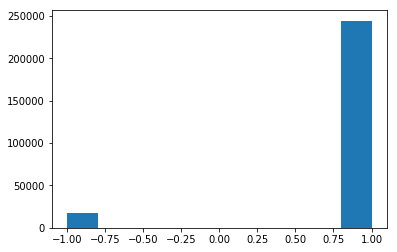

In [133]:
plt.figure(7)
plt.imshow(Y)
plt.title("Noisy Image")
plt.figure(8)
plt.imshow(X)
plt.title("Denoised Image")
plt.figure(9)
plt.hist(X.flatten())


## Extension to gray scale
Let us extend the denoising method to gray level images. 
Scalar product might be replaced by distance functions.
The complete energy function for the model then takes the form
$$E(X,Y)=-h \sum_i d_1(x_i,x_i) + \beta \sum_i \sum_{j \in \mathcal{N(i)}} d_2(x_i,x_j) +\eta \sum_i d_3(x_i,y_i)  $$
$$d_1=d_2=d_3=\Vert a -b \Vert_2$$

In [135]:
def MRF_ICM(X,Y,h,beta,eta,nbiter):
    
    H,W,C = Y.shape
    xx=[]
    for ii in range(1,W-1):
        xx.append(ii)
    np.random.shuffle(xx)

    yy=[]
    for jj in range(1,H-1):
        yy.append(jj)
    np.random.shuffle(yy)
    
    it=0
    while it<nbiter:
        E=0
        for i in xx : 
            for j in yy : 
                x_i=[0,0,0]
                
                e1 = -h*np.linalg.norm(x_i,2)

                x_down=X[i,j-1]
                x_up=X[i,j+1]
                x_left=X[i-1,j]
                x_right=X[i+1,j]        
                e2 = np.linalg.norm(x_i-x_down,2) + np.linalg.norm(x_i-x_up,2)+np.linalg.norm(x_i-x_left,2)+np.linalg.norm(x_i-x_right,2)
                e2=beta*e2

                y_i=Y[i,j]
                e3=eta*np.linalg.norm(x_i-y_i,2)

                Eminus=e1+e2+e3


                x_i=[1,0,0]
                e1 = -h*np.linalg.norm(x_i,2)

                x_down=X[i,j-1]
                x_up=X[i,j+1]
                x_left=X[i-1,j]
                x_right=X[i+1,j]        
                e2 = np.linalg.norm(x_i-x_down,2) + np.linalg.norm(x_i-x_up,2)+np.linalg.norm(x_i-x_left,2)+np.linalg.norm(x_i-x_right,2)
                e2=beta*e2

                y_i=Y[i,j]
                e3=eta*np.linalg.norm(x_i-y_i,2)

                Eplus=e1+e2+e3

                if Eminus<Eplus:
                    X[i,j]=[0,0,0]
                    E=E+Eminus
                else:
                    X[i,j]=[1,0,0]
                    E=E+Eplus
        it=it+1
        print("Iteration=",it," Energy=", E)
        plt.figure((it+10))
        plt.imshow(X)
        plt.title("Iteration "+str(it))
    return X,E




### Now let us the the function MRF_ICM

(512, 512, 3)
Iteration= 1  Energy= 87175.0
Iteration= 2  Energy= 36537.0
Iteration= 3  Energy= 35848.0


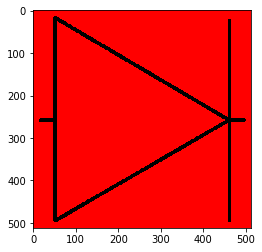

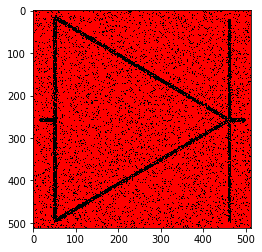

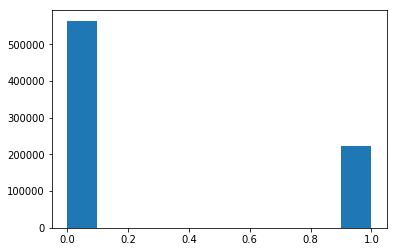

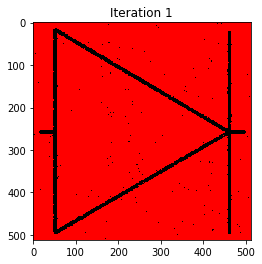

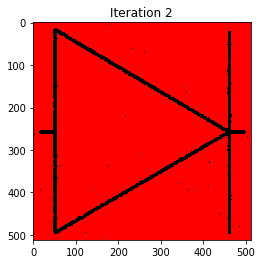

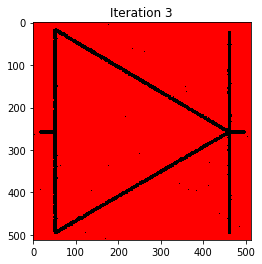

In [136]:

Y=mpimg.imread("symbol031.png")
print(Y.shape)
Y[:,:,1]=0
Y[:,:,2]=0
plt.figure(6)
plt.imshow(Y)



noise = np.random.rand(Y.shape[0],Y.shape[1])
noise=noise<0.1
noise = 1-noise



Y[:,:,0]=Y[:,:,0]+noise

Y[Y[:,:,0]==2,0]=0
Y[:,:,0]=1-Y[:,:,0]

plt.figure(5)
plt.imshow(Y)

plt.figure(10)
plt.hist(Y.flatten())



h=0.0
beta=1.0
eta=1.0
nbiter=3
X=Y.copy()

X,E=MRF_ICM(X,Y.copy(),h,beta,eta,nbiter)    


        

(array([542169.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 244263.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

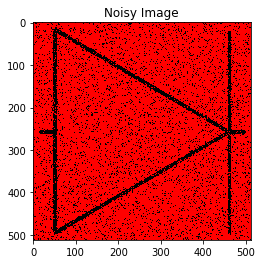

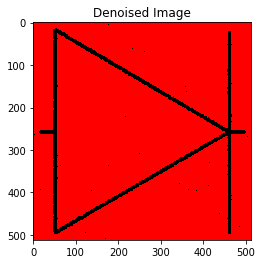

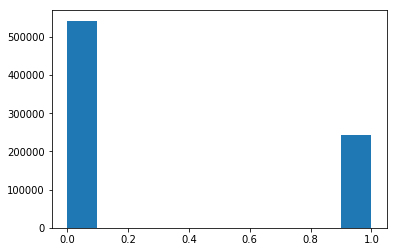

In [137]:
plt.figure(7)
plt.imshow(Y)
plt.title("Noisy Image")
plt.figure(8)
plt.imshow(X)
plt.title("Denoised Image")
plt.figure(9)
plt.hist(X.flatten())

Another point is that $x_i$ can take more than 2 values i.e. -1, 1 so all cases of should be considered $x_i \in \{0, \cdots, 255\}$. The enumeration of all the cases is time consuming so we decide to enumerate values around $x_i$ such that $x_i-bound \leq x_i \leq x_i+bound$. Bound is a scalar that defines the neiborhood (the range). We should assign to $x_i$ the value that minimizes at best the energy.

In [152]:
def MRF_ICM(X,Y,h,beta,eta,nbiter,bound):
    
    H,W,C = Y.shape
    xx=[]
    for ii in range(1,W-1):
        xx.append(ii)
    

    yy=[]
    for jj in range(1,H-1):
        yy.append(jj)
    
    np.random.shuffle(xx)
    np.random.shuffle(yy)
    
    it=0
    while it<nbiter:        
        E=0
        for i in xx : 
            for j in yy : 
                
                listenergy=[]
                x_i=[0,0,0]
                low=int(max(X[i,j,0]-bound,0))
                high=int(min(X[i,j,0]+bound+1,256))
                for val in range(low,high):
                    x_i[0]=val

                    e1 = -h*np.linalg.norm(x_i,2)

                    x_down=X[i,j-1]
                    x_up=X[i,j+1]
                    x_left=X[i-1,j]
                    x_right=X[i+1,j]        
                    e2 = np.linalg.norm(x_i-x_down,2) + np.linalg.norm(x_i-x_up,2)+np.linalg.norm(x_i-x_left,2)+np.linalg.norm(x_i-x_right,2)
                    e2=beta*e2

                    y_i=Y[i,j]
                    e3=eta*np.linalg.norm(x_i-y_i,2)

                    Ecur=e1+e2+e3
                    listenergy.append(Ecur)
                
                valmin=np.argmin(listenergy)
                X[i,j]=[valmin+low,0,0]
                E=E+listenergy[valmin]
        it=it+1
        plt.figure((it+10))
        print("Iteration=",it," Energy=", E)
        if it%5==0:
            plt.figure((it+10))
            plt.imshow(X[:,:,0],cmap='gray')
            plt.title("Iteration "+str(it))
            

    return X,E




Let's try this algorithm on our symbol image. For convenience (to use the np.linalg.norm function), the image whill have 3 channels but only the first one will carry information.

(512, 512, 3)
Iteration= 1  Energy= 86785.0
Iteration= 2  Energy= 37010.0


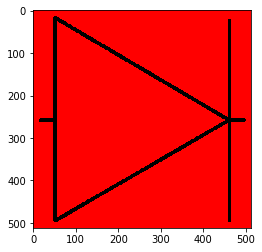

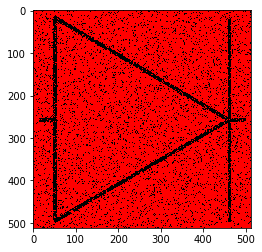

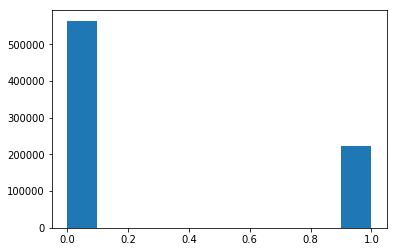

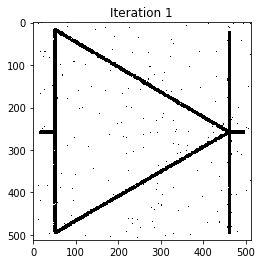

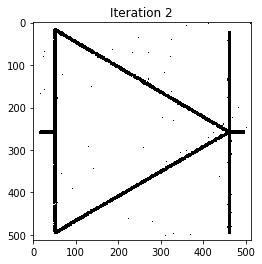

In [141]:

Y=mpimg.imread("symbol031.png")
print(Y.shape)
Y[:,:,1]=0
Y[:,:,2]=0
plt.figure(6)
plt.imshow(Y)



noise = np.random.rand(Y.shape[0],Y.shape[1])
noise=noise<0.1
noise = 1-noise



Y[:,:,0]=Y[:,:,0]+noise

Y[Y[:,:,0]==2,0]=0
Y[:,:,0]=1-Y[:,:,0]

plt.figure(5)
plt.imshow(Y)

plt.figure(10)
plt.hist(Y.flatten())



h=0.0
beta=1.0
eta=1.0
nbiter=2
bound=1
X=Y.copy()

X,E=MRF_ICM(X,Y.copy(),h,beta,eta,nbiter,bound)    

(array([542228.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 244204.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

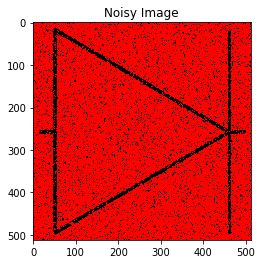

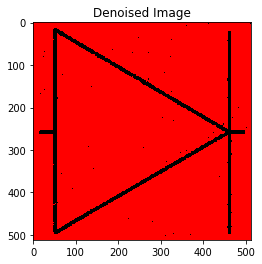

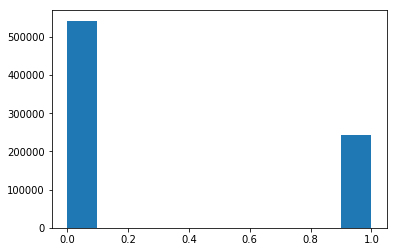

In [142]:
plt.figure(7)
plt.imshow(Y)
plt.title("Noisy Image")
plt.figure(8)
plt.imshow(X)
plt.title("Denoised Image")
plt.figure(9)
plt.hist(X.flatten())

For convenience, the image whill have 3 channels but only the first one will carry information grey-level information.

(512, 512, 3)
144.0
Iteration= 1  Energy= 30149011.0
Iteration= 2  Energy= 29176116.0
Iteration= 3  Energy= 28234800.0
Iteration= 4  Energy= 27324855.0
Iteration= 5  Energy= 26445782.0
Iteration= 6  Energy= 25597060.0
Iteration= 7  Energy= 24778463.0
Iteration= 8  Energy= 23989463.0
Iteration= 9  Energy= 23229375.0
Iteration= 10  Energy= 22497935.0
Iteration= 11  Energy= 21794438.0
Iteration= 12  Energy= 21118159.0
Iteration= 13  Energy= 20468904.0
Iteration= 14  Energy= 19846512.0
Iteration= 15  Energy= 19250230.0
Iteration= 16  Energy= 18678990.0


C:\Users\raveaux\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Iteration= 17  Energy= 18132781.0
Iteration= 18  Energy= 17611200.0
Iteration= 19  Energy= 17113816.0
Iteration= 20  Energy= 16639540.0
Iteration= 21  Energy= 16187593.0
Iteration= 22  Energy= 15757772.0
Iteration= 23  Energy= 15349943.0
Iteration= 24  Energy= 14963617.0
Iteration= 25  Energy= 14597943.0
Iteration= 26  Energy= 14252164.0
Iteration= 27  Energy= 13925093.0
Iteration= 28  Energy= 13615863.0
Iteration= 29  Energy= 13324302.0
Iteration= 30  Energy= 13049889.0
Iteration= 31  Energy= 12792711.0
Iteration= 32  Energy= 12551372.0
Iteration= 33  Energy= 12325552.0
Iteration= 34  Energy= 12114654.0
Iteration= 35  Energy= 11917664.0
Iteration= 36  Energy= 11734330.0
Iteration= 37  Energy= 11563944.0
Iteration= 38  Energy= 11405897.0
Iteration= 39  Energy= 11259189.0
Iteration= 40  Energy= 11123619.0
Iteration= 41  Energy= 10998090.0
Iteration= 42  Energy= 10882459.0
Iteration= 43  Energy= 10776015.0
Iteration= 44  Energy= 10677968.0
Iteration= 45  Energy= 10588030.0
Iteration= 46 

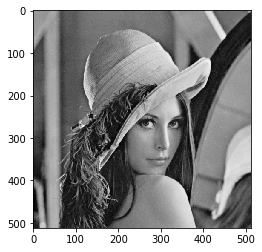

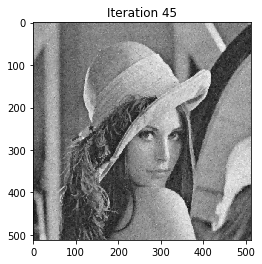

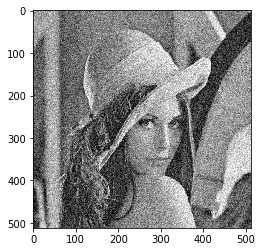

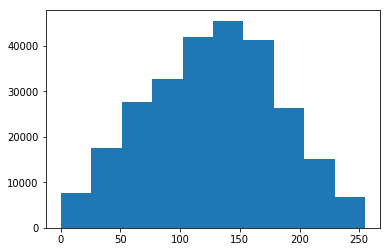

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

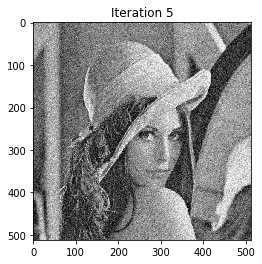

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

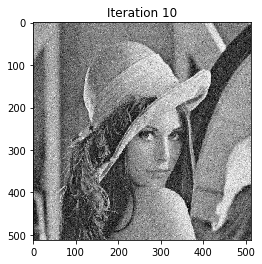

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

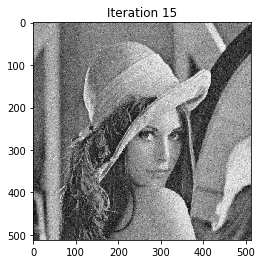

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

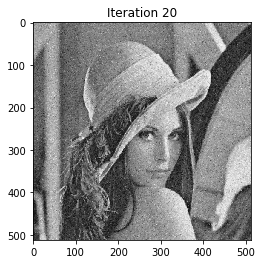

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

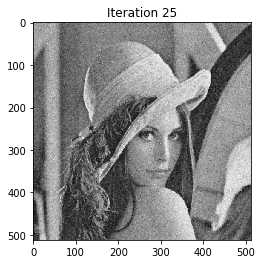

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

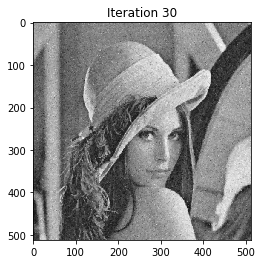

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

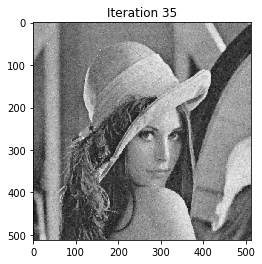

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

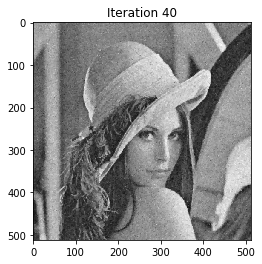

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

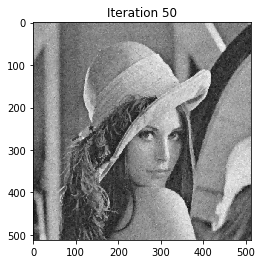

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

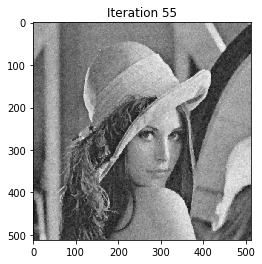

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

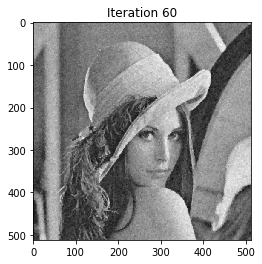

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

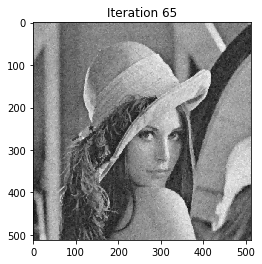

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

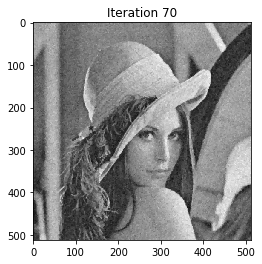

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

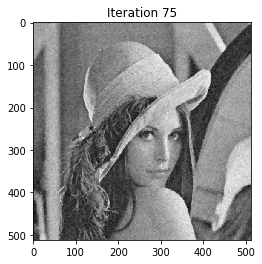

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

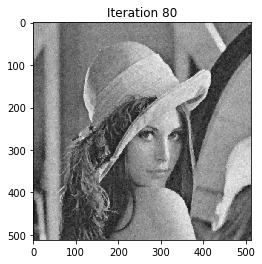

In [153]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])


img=mpimg.imread("lena.png")
gray = rgb2gray(img)
Y=img
print(Y.shape)
Y[:,:,0]=gray
Y[:,:,1]=0
Y[:,:,2]=0
plt.figure(6)
plt.imshow(Y[:,:,0],cmap='gray')



noise = np.random.normal(0.0,0.1,(Y.shape[0],Y.shape[1]))
#0.1*np.random.randn(Y.shape[0],Y.shape[1])
plt.figure(55)
plt.hist(noise.flatten())
Y[:,:,0]=Y[:,:,0]+noise
Y[Y[:,:,0]>1,0]=1
Y[Y[:,:,0]<0,0]=0


Y[:,:,0]=np.round(255*Y[:,:,0],0)
print(Y[0,0,0])
plt.figure(5)
plt.imshow(Y[:,:,0],cmap='gray')

plt.figure(10)
plt.hist(Y[:,:,0].flatten())


h=0.0
beta=1.0
eta=1.0
nbiter=80
X=Y.copy()

X,E=MRF_ICM(X,Y.copy(),h,beta,eta,nbiter)    

(array([  361., 17407., 33221., 29920., 43481., 52915., 45903., 21451.,
        16143.,  1342.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

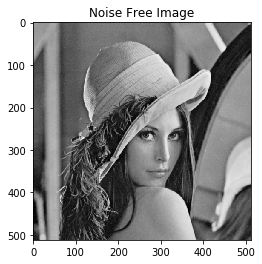

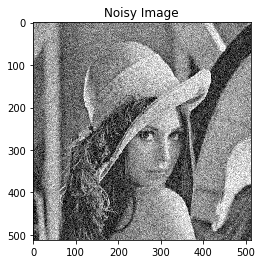

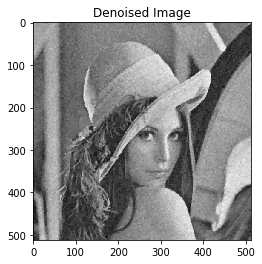

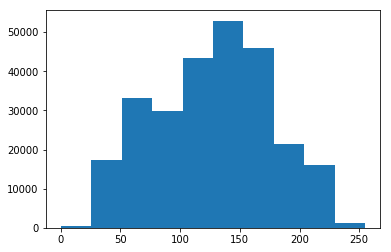

In [151]:
img=mpimg.imread("lena.png")
gray = rgb2gray(img)
plt.figure(6)
plt.imshow(gray,cmap='gray')
plt.title("Noise Free Image")
plt.figure(7)
plt.imshow(Y[:,:,0],cmap='gray')
plt.title("Noisy Image")
plt.figure(8)
plt.imshow(X[:,:,0],cmap='gray')
plt.title("Denoised Image")
plt.figure(9)
plt.hist(X[:,:,0].flatten())